<a href="https://colab.research.google.com/github/alfinmaulani/skripsi/blob/master/combined(glove).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade scikit-learn
import numpy as np
import pandas as pd
import io
import os
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import gensim

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [191]:
url0='https://raw.githubusercontent.com/alfinmaulani/skripsi/master/dataISEAR.csv'
df = pd.read_csv(url0)

In [192]:
df=df.drop(df[df['emosi'] == 'shame'].sample(frac=1).index)
df=df.drop(df[df['emosi'] == 'guilt'].sample(frac=1).index)

In [62]:
df.emosi.value_counts()

joy        1092
sadness    1082
anger      1079
fear       1076
disgust    1066
Name: emosi, dtype: int64

In [193]:
df1 = pd.read_csv(url0)

In [194]:
df1=df1.drop(df1[df1['emosi'] == 'joy'].sample(frac=1).index)
df1=df1.drop(df1[df1['emosi'] == 'sadness'].sample(frac=1).index)
df1=df1.drop(df1[df1['emosi'] == 'anger'].sample(frac=1).index)
df1=df1.drop(df1[df1['emosi'] == 'fear'].sample(frac=1).index)
df1=df1.drop(df1[df1['emosi'] == 'disgust'].sample(frac=1).index)

In [195]:
df2=pd.read_csv('https://raw.githubusercontent.com/alfinmaulani/skripsi/master/korpus2.txt', delimiter = ";")
df2.columns=['dok','tes']

In [196]:
df3=pd.read_csv('https://raw.githubusercontent.com/alfinmaulani/skripsi/master/korpus3.csv')

In [197]:
df4=pd.read_csv('https://raw.githubusercontent.com/alfinmaulani/skripsi/master/korpus4.tsv', delimiter = "	")
df4.columns=['dok','num','code']

In [198]:
df5=pd.read_csv('https://raw.githubusercontent.com/alfinmaulani/skripsi/master/twitter_prosessed2.csv')#bad

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [200]:
dftwit = pd.read_csv('/content/drive/MyDrive/twitter_prosessed.csv')

In [ ]:
# df3 = pd.read_csv('/content/drive/MyDrive/idwiki_new_lower.txt', delimiter = "\t")
# df3.columns = ["arti"]

In [ ]:
# df4 = pd.read_csv('/content/drive/MyDrive/idwiki_new_lower2.txt', delimiter = "\t")
# df4.columns = ["arti"]

persiapan corpus tambahan

In [201]:
final=[]

In [202]:
final.extend(df1.dokumen)

In [203]:
final.extend(df2.dok)

In [204]:
final.extend(df3.content)

In [205]:
final.extend(df4.dok)

In [206]:
final.extend(df5.content)

In [207]:
final.extend(dftwit.tweet)

In [208]:
dfg = pd.DataFrame(final)
dfg.columns=["dok"]

preputama : lower case

In [22]:
def lower(temp):
  return temp.str.lower()

In [209]:
df['dokumen']=lower(df['dokumen'])

In [210]:
dfg['dok']=lower(dfg['dok'])

preputama : Pembersihan noise (over enter and space)

In [25]:
def bersih_noise(temp):
  temp=temp.replace(' \n', ' ', regex=True)
  temp=temp.replace('   ', ' ', regex=True)
  return temp.replace('  ', ' ', regex=True)

In [211]:
df=bersih_noise(df)

In [212]:
dfg=bersih_noise(dfg)

preptambah : expand contractions

In [176]:
!pip install contractions
import contractions
def expand_word(temp):
  expanded_words = []   
  for word in temp:
    expanded_words.append(contractions.fix(word))
  return expanded_words

In [213]:
df.dokumen=expand_word(df.dokumen)

In [214]:
dfg.dok=expand_word(dfg.dok)

preputama : cleansing punctuation

In [31]:
def clns_punc(temp):
  return temp.str.replace(r'[^\w\s]+', '')

In [215]:
df['dokumen'] = clns_punc(df['dokumen'])

In [216]:
dfg['dok'] = clns_punc(dfg['dok'])

preputama : cleansing number

In [34]:
!pip install tweet-preprocessor
import preprocessor as p
p.set_options(p.OPT.NUMBER)
def clns_numb(temp):
  sementara=[]
  for word in temp:
    sementara.append(p.clean(word))
  return sementara

In [217]:
df.dokumen=clns_numb(df.dokumen)

In [218]:
dfg.dok=clns_numb(dfg.dok)

preptambah : remove stopword

In [37]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
pat = r'\b(?:{})\b'.format('|'.join(stop))
def remove_stopw(temp):
  temp=temp.str.replace(pat, '')
  return temp.str.replace(r'\s+', ' ')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [219]:
df['dokumen'] = remove_stopw(df['dokumen'])

In [220]:
dfg['dok'] = remove_stopw(dfg['dok'])

tokenizing

In [40]:
def token(temp):
  return [word_tokenize(x) for x in temp]

In [221]:
df.dokumen=token(df.dokumen)

In [222]:
dfg.dok=token(dfg.dok)

preptambah : Lemmatization

In [43]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
def lemma(temp):
  temp.apply(lambda x: [stemmer.stem(y) for y in x])

In [223]:
lemma(df['dokumen'])

In [224]:
lemma(dfg['dok'])

save df

In [ ]:
# df.to_csv(r'dataisear(preptambah).csv', index = False)

gabung corpus

In [ ]:
# sent=df.dokumen

In [225]:
sent=dfg.dok.append(df.dokumen,ignore_index=True)

glove

In [47]:
!pip install glove-python-binary
from glove import Glove
from glove import Corpus

     |████████████████████████████████| 948 kB 5.1 MB/s 


In [226]:
korpus = Corpus()
korpus.fit(sent, window=5, ignore_missing=True)

In [ ]:
# (corpus, window=10, ignore_missing=False)

In [227]:
glove = Glove(no_components=100, learning_rate=0.1, alpha=0.025, max_count=100, max_loss=10.0, random_state=None)
glove.fit(korpus.matrix)
glove.add_dictionary(korpus.dictionary)

In [ ]:
# (no_components=30, learning_rate=0.05, alpha=0.75, max_count=100, max_loss=10.0, random_state=None)

cek model

In [228]:
glove.word_vectors.shape

(436866, 100)

In [229]:
glove.word_vectors[glove.dictionary['moment']]

array([-0.11157544,  0.07414765,  0.01409087,  0.79368165, -0.02688172,
       -0.01272052, -0.08787628,  0.03282536, -0.08909596,  0.10494363,
       -0.23331836, -0.29716027, -0.34978803, -0.14801592, -0.3082883 ,
       -0.14133226,  0.09044859,  0.0841182 , -0.00307253,  0.19269517,
        0.05197871, -0.08932419,  0.02395874, -0.15326975, -0.02450205,
        0.07762799, -0.13254543, -0.10389828, -0.14013187,  0.14668189,
        0.1798678 , -0.05196404, -0.12136875,  0.20597794,  0.01231832,
        0.23950422, -0.03801975,  0.01405188, -0.17699689, -0.19428423,
        0.0912476 ,  0.25926249,  0.1459664 , -0.0160885 ,  0.15715717,
        0.25894333,  0.02440544, -0.29746063, -0.03238915, -0.14816546,
       -0.11627997,  0.18475614,  0.01103825,  0.0457963 , -0.04335381,
       -0.1031593 , -0.07527653,  0.00507309,  0.05070122, -0.01037689,
        0.07436349,  0.11494161, -0.10789038,  0.13639008, -0.17804218,
        0.21965603, -0.04376453, -0.24064243, -0.41818738, -0.13

ekstraksi fitur

In [230]:
import array
ekstrak=[]
temp=array.array('i',(0,)*100)
for senten in df.dokumen:
  for word in senten:
    temp=np.add(temp,glove.word_vectors[glove.dictionary[word]])
  temp=temp/len(senten)
  ekstrak.append(temp)
has_vec=ekstrak

In [231]:
X=has_vec
y=df.emosi
print(np.shape(X))
print(np.shape(y))
# print(X)
# print(y)

(5395, 100)
(5395,)


klasifikasi svm

In [100]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [ ]:
# langsung cari score

# clf = svm.SVC(kernel='poly', decision_function_shape='ovr')
# scores = cross_val_score(clf, X, y, cv=10)
# # scores.mean()

conf matrix dan akurasi

In [101]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
# svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
#  class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

In [ ]:
# cross_val_predict(estimator, X, y=None, *, groups=None, cv=None, n_jobs=None, verbose=0, fit_params=None, 
# pre_dispatch='2*n_jobs', method='predict')

In [56]:
def klasifikasi(krnl):
  clf = svm.SVC(kernel=krnl, decision_function_shape='ovr')
  y_pred = cross_val_predict(clf, X, y, cv=10)
  ConfusionMatrixDisplay.from_predictions(y, y_pred)
  plt.show()
  print(accuracy_score(y, y_pred))
  print(precision_recall_fscore_support(y, y_pred, average='macro'))

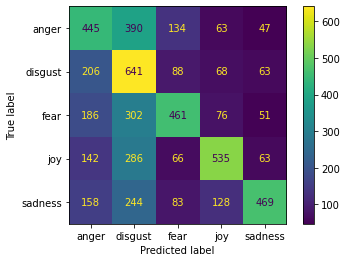

0.47284522706209453
(0.5162492554178844, 0.47311083815589383, 0.4792715370391786, None)


In [232]:
klasifikasi('poly')

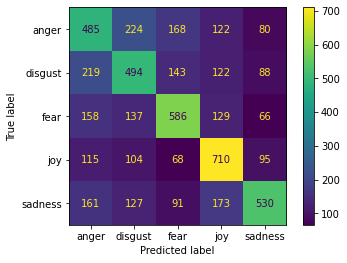

0.5199258572752549
(0.5236547921188394, 0.5195062719858369, 0.5194469683065343, None)


In [233]:
klasifikasi('rbf')

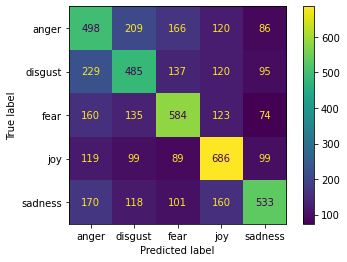

0.516404077849861
(0.5195400996666825, 0.5160145322361084, 0.5162236699752243, None)


In [234]:
klasifikasi('linear')